In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [338]:
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv('train.csv')

In [54]:
test = pd.read_csv('test.csv')

In [17]:
from sklearn.preprocessing import LabelEncoder

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
from sklearn.metrics import accuracy_score

In [344]:
from sklearn.metrics import classification_report

In [409]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [18]:
def preprocessing(data):
    enc = LabelEncoder()
    data.smoking_status = enc.fit_transform(data.smoking_status)
    data.gender = enc.fit_transform(data.gender)
    data.ever_married = enc.fit_transform(data.ever_married)
    data.work_type = enc.fit_transform(data.work_type)
    data.Residence_type = enc.fit_transform(data.Residence_type)
    return data

In [55]:
test = preprocessing(test)

In [57]:
test = test.drop('id',axis=1)

In [19]:
df = preprocessing(df)

In [21]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,1,28.0,0,0,1,2,1,79.53,31.1,2,0
1,1,1,33.0,0,0,1,2,0,78.44,23.9,1,0
2,2,0,42.0,0,0,1,2,0,103.00,40.3,0,0
3,3,1,56.0,0,0,1,2,1,64.87,28.8,2,0
4,4,0,24.0,0,0,0,2,0,73.36,28.8,2,0


In [23]:
X = df.drop(['id','stroke'],axis=1)
y = df['stroke']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [29]:
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

# 1- Light Gm Model

In [30]:
import lightgbm as lgb

In [32]:
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

[LightGBM] [Info] Number of positive: 473, number of negative: 11005
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 11478, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.041209 -> initscore=-3.147010
[LightGBM] [Info] Start training from score -3.147010


In [49]:
#Prediction
y_pred1=clf.predict(x_test)#convert into binary values
for i in range(0,99):
    if y_pred1[i]>=.5:       # setting threshold to .5
       y_pred1[i]=1
    else:  
       y_pred1[i]=0

In [50]:
#Confusion matrixfrom sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)#Accuracyfrom sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred1,y_test)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [51]:
y_pred1.min(),y_pred1.max()

(0.0, 0.1442311181070891)

In [45]:
y_pred=clf.predict(x_test)

In [52]:
y_pred.min(), y_pred.max()

(0.03178909380464554, 0.1442311181070891)

In [60]:
sub = pd.read_csv('sample_submission.csv')

In [61]:
#Prediction
test_pred1=clf.predict(test)#convert into binary values
for i in range(0,99):
    if test_pred1[i]>=.5:       # setting threshold to .5
       test_pred1[i]=1
    else:  
       test_pred1[i]=0

In [62]:
sub['stroke'] = test_pred1

In [63]:
sub.to_csv('sub2.csv',index=False)

In [64]:
test_pred2 = clf.predict(test)

In [65]:
sub['stroke'] = test_pred2

In [66]:
sub.to_csv('sub3.csv',index=False)

In [67]:
import lightgbm as lgb

# Neural Network

In [81]:
import tensorflow as tf

In [84]:
X.shape, y.shape

((15304, 10), (15304,))

In [119]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1,activation='sigmoid')])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
479/479 [==============================] - 2s 2ms/step - loss: 4.1707 - accuracy: 0.4255
Epoch 2/5
479/479 [==============================] - 1s 2ms/step - loss: 0.4768 - accuracy: 0.8529
Epoch 3/5
479/479 [==============================] - 1s 2ms/step - loss: 0.3260 - accuracy: 0.9274
Epoch 4/5
479/479 [==============================] - 1s 2ms/step - loss: 0.2683 - accuracy: 0.9522
Epoch 5/5
479/479 [==============================] - 1s 2ms/step - loss: 0.2349 - accuracy: 0.9573


In [120]:
pred3 = model_1.predict(test)

319/319 [==============================] - 1s 1ms/step


In [121]:
pred3.min(), pred3.max()

(0.00024858394, 0.7938197)

In [123]:
sub['stroke'] = pred3

In [124]:
sub.to_csv('sub4.csv',index=False)

In [125]:
# Evaluate the model
model_1.evaluate(X, y)

479/479 [==============================] - 1s 2ms/step - loss: 0.2237 - accuracy: 0.9582


[0.22372373938560486, 0.958180844783783]

In [333]:
tf.random.set_seed(42)

# Create the model (same as model_7)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='linear'),
    tf.keras.layers.Dense(10,activation='linear'),
    tf.keras.layers.Dense(10,activation='linear'),
    tf.keras.layers.Dense(10,activation='linear'),
    tf.keras.layers.Dense(10,activation='linear'),
    tf.keras.layers.Dense(10,activation='linear'),
    tf.keras.layers.Dense(10,activation='linear'),
    tf.keras.layers.Dense(10,activation='linear'),
    tf.keras.layers.Dense(10,activation='linear'),
    tf.keras.layers.Dense(10,activation='linear'),
    tf.keras.layers.Dense(10,activation='linear'),
    tf.keras.layers.Dense(10,activation='linear'),
    tf.keras.layers.Dense(10,activation='linear'),
  tf.keras.layers.Dense(10,activation='linear'), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
#     tf.keras.layers.Dense(1,),
  tf.keras.layers.Dense(1,activation='relu') # output layer, using 'sigmoid' for the output
])

# Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_2.fit(X, y, epochs=5)

Epoch 1/5


C:\Users\ali\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


479/479 [==============================] - 4s 4ms/step - loss: 0.7021 - accuracy: 0.9544
Epoch 2/5
479/479 [==============================] - 2s 4ms/step - loss: 0.6370 - accuracy: 0.9587
Epoch 3/5
479/479 [==============================] - 2s 4ms/step - loss: 0.6370 - accuracy: 0.9587
Epoch 4/5
479/479 [==============================] - 2s 4ms/step - loss: 0.6370 - accuracy: 0.9587
Epoch 5/5
479/479 [==============================] - 2s 4ms/step - loss: 0.6370 - accuracy: 0.9587


In [331]:
(model_2.predict(test)).min(), (model_2.predict(test)).max()

319/319 [==============================] - 1s 2ms/step


(1.6248418e-08, 0.14738698)

In [284]:
sub1['stroke'].min() , sub1['stroke'].max()

(-0.0840460817668595, 0.3877009737947089)

Text(0.5, 1.0, 'Model_8 training curves')

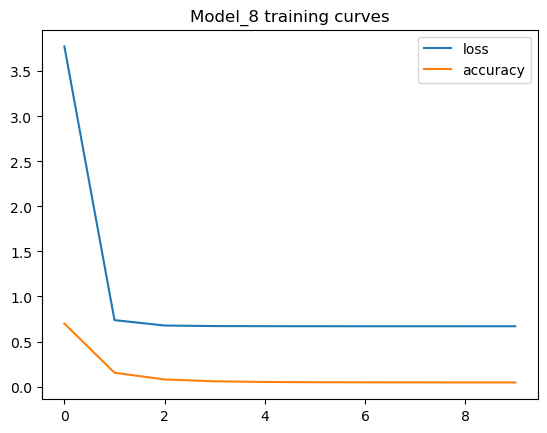

In [301]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

In [254]:
sub1['stroke'].min(), sub1['stroke'].max()

(-0.0840460817668595, 0.3877009737947089)

In [270]:
sub[sub['stroke']<0]

,id,stroke


In [309]:
sub['stroke'] = model_2.predict(test)
sub['stroke'].describe()

319/319 [==============================] - 1s 2ms/step


count    10204.000000
mean        -0.014654
std          0.010416
min         -0.014881
25%         -0.014881
50%         -0.014881
75%         -0.014881
max          0.805348
Name: stroke, dtype: float64

In [212]:
sub.to_csv('sub5.csv',index=False)

In [264]:
sub1['stroke'].describe()

count    10204.000000
mean         0.041977
std          0.064143
min         -0.084046
25%         -0.004406
50%          0.027692
75%          0.072049
max          0.387701
Name: stroke, dtype: float64

In [128]:
pred4.min(), pred4.max()

(0.00023067843, 0.19862467)

In [ ]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set 

In [133]:
sub1 = pd.read_csv('sub1.csv')

In [134]:
sub1['stroke'].min() , sub1['stroke'].max()

(-0.0840460817668595, 0.3877009737947089)

In [135]:
sub2 = pd.read_csv('sub2.csv')
sub2['stroke'].min() , sub2['stroke'].max()

(0.0, 0.1417601846084031)

In [137]:
sub3 = pd.read_csv('sub3.csv')
sub3['stroke'].min() , sub3['stroke'].max()

(0.0436382263854501, 0.1417601846084031)

In [138]:
sub4 = pd.read_csv('sub4.csv')
sub4['stroke'].min() , sub2['stroke'].max()

(0.00024858394, 0.1417601846084031)

## Split Test Train Set

In [139]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11478, 10), (3826, 10), (11478,), (3826,))

In [141]:
X.shape, y.shape

((15304, 10), (15304,))

In [142]:
15304-11478 , 15304-3826

(3826, 11478)

In [143]:
# Split data into train and test sets
X_train, y_train = X[:11478], y[:11478] # 80% of the data for the training set
X_test, y_test = X[11478:], y[11478:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set 

((11478, 10), (3826, 10))

# Check Overfiting

Text(0.5, 1.0, 'Model_8 training curves')

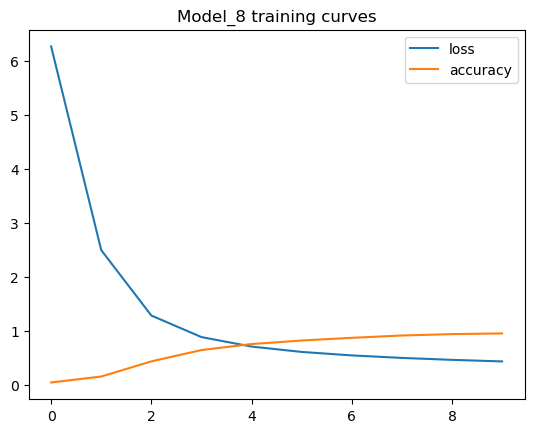

In [156]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

In [213]:
## ToMorrow i will Continuo this damp

## knn

In [347]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [336]:
X = df.drop(['id','stroke'],axis=1)

In [337]:
y = df.stroke

In [339]:
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [341]:
knnc = KNeighborsClassifier()

In [342]:
knnc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [343]:
knnc.score(X_test,y_test)

0.9560899111343439

In [345]:
print(classification_report(y_test,knnc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3667
           1       0.30      0.04      0.08       159

    accuracy                           0.96      3826
   macro avg       0.63      0.52      0.53      3826
weighted avg       0.93      0.96      0.94      3826



In [375]:
knnr = KNeighborsRegressor(leaf_size=100)

In [376]:
knnr.fit(X_train,y_train)

KNeighborsRegressor(leaf_size=100)

In [377]:
knnr.score(X_test,y_test)

0.008611429835709616

In [374]:
print(classification_report(y_test,knnr.predict(X_test)))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

# SVC

In [380]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [384]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',class_weight='balanced'))

In [385]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced', gamma='auto'))])

In [386]:
clf.score(X_test,y_test)

0.799790904338735

In [388]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88      3667
           1       0.14      0.76      0.24       159

    accuracy                           0.80      3826
   macro avg       0.56      0.78      0.56      3826
weighted avg       0.95      0.80      0.86      3826



## Logistic Regresion

In [389]:
from sklearn.linear_model import LogisticRegression

In [391]:
lr = LogisticRegression()

In [392]:
lr.fit(X_train,y_train)

C:\Users\ali\miniconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [393]:
lr.score(X_test,y_test)

0.9568740198640878

## Sklearn Documention

In [395]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [396]:
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.96

## Leanier Regresion

In [397]:
from sklearn.linear_model import LinearRegression

In [398]:
X = df.drop(['id','stroke'],axis=1)
y = df.stroke
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [422]:
lr = LinearRegression()

In [423]:
lr.fit(X_train,y_train)

LinearRegression()

In [421]:
lr.score(X_test,y_test)

0.10257615790674046

In [405]:
lrpred = lr.predict(X_test)

In [407]:
lrpred.min(), lrpred.max()

(-0.08166571829994987, 0.3977152833229828)

In [417]:
mean_absolute_error(y_test,lr.predict(X_test))

0.08326135355496907

In [418]:
mean_absolute_error(y_train,lr.predict(X_train))

0.08286495419116649

In [424]:
model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

In [425]:
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [427]:
mean_absolute_error(y_test,model.predict(X_test))

0.08326135355496905

In [429]:
pred6 = model.predict(test)

In [431]:
sub['stroke'] = pred6

In [432]:
sub.to_csv('sub6.csv',index=False)

# Outlier

In [435]:
df.skew().sort_values(ascending=False)

heart_disease        6.316649
stroke               4.611121
hypertension         4.143196
avg_glucose_level    3.037242
bmi                  0.713051
gender               0.483809
Residence_type       0.003137
id                   0.000000
age                 -0.103579
smoking_status      -0.120047
work_type           -0.196099
ever_married        -0.764840
dtype: float64

In [438]:
X.skew().sort_values(ascending=False)

heart_disease        6.316649
hypertension         4.143196
avg_glucose_level    3.037242
bmi                  0.713051
gender               0.483809
Residence_type       0.003137
age                 -0.103579
smoking_status      -0.120047
work_type           -0.196099
ever_married        -0.764840
dtype: float64

In [439]:
df.hypertension

0        0
1        0
2        0
3        0
4        0
        ..
15299    0
15300    1
15301    0
15302    0
15303    0
Name: hypertension, Length: 15304, dtype: int64

In [440]:
from sklearn.naive_bayes import GaussianNB
# X, y = load_iris(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 3826 points : 358


In [441]:
gnb.fit(X_train, y_train)
gnb.score(X_test,y_test)

0.9064296915838996

In [444]:
y_pred = gnb.fit(X_train, y_train).predict(test)

In [445]:
sub['stroke'] = y_pred

In [446]:
sub.to_csv('sub7.csv',index=False)

In [453]:
(358/3826) *100

9.357030841610037

In [451]:
len(sub)

10204

In [454]:
## Waoooo Ensampling Model